In [14]:
# Find the entities that are most often misclassified
# Find patterns in their usage in the NLI dataset
# Compare the entities to the most ambiguous entities: Are they the same?

In [122]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

In [16]:
from nlinec.data.load import load_data, get_all_types
from nlinec.data.preprocessing import get_granularity
from nlinec.utils import get_results_dir

## Setup

In [17]:
# Specify the dataset to predict and a file to save the predictions to
DATASET = 'g_test.json'
SAVE_PREDICTIONS_TO = os.path.join(get_results_dir(), "predictions", "zero-shot", "test_predictions.csv")

# Specify the parameters for the analysis
MODEL = "roberta-large-mnli"

In [18]:
gran_types = []
for i in [1, 2, 3]:
    all_types = get_all_types(granularity=i)
    all_types['granularity'] = all_types['full_type'].apply(lambda x: get_granularity(x))
    gran_types.append(all_types[all_types['granularity'] == i])

In [19]:
gran_types[0]

,full_type,type,granularity
0,/other,other,1
3,/person,person,1
11,/location,location,1
27,/organization,organization,1


In [20]:
data = load_data(DATASET)
data

8963it [00:00, 95631.11it/s]


,mention_span,full_type,sentence
0,Valley Federal Savings & Loan Association,"[/organization, /organization/company]",Valley Federal Savings & Loan Association sai...
1,Valley Federal,"[/organization, /organization/company]","Terms weren't disclosed, but Valley Federal ha..."
2,Valley Federal,"[/organization, /organization/company]",Valley Federal said Friday that it is conside...
3,"Valley Federal , with assets of $ 3.3 billion ,","[/organization, /organization/company]","Valley Federal , with assets of $ 3.3 billion..."
4,Imperial Corp. of America,"[/organization, /organization/company]",Valley Federal Savings & Loan Association said...
...,...,...,...
8958,"Fridays in general , which tend to be strong d...",[/other],Another study found that the 82 Fridays the 13...
8959,stocks,[/other],"But the date tends to be a plus, not a minus, ..."
8960,the 1962 - 85 period,[/other],"But their study, which spanned the 1962 - 85 p..."
8961,professors,[/person],"Robert Kolb and Ricardo Rodriguez, professors ..."


In [21]:
predictions_df = pd.read_csv(SAVE_PREDICTIONS_TO, index_col=0)
predictions_df

,/other,/other/body_part,/person/title,/person,/person/athlete,/other/art,/other/art/music,/other/event,/other/event/holiday,/other/religion,...,/other/award,/person/coach,/other/language/programming_language,/other/product/computer,/other/event/sports_event,/organization/stock_exchange,/location/structure/hotel,/location/transit/bridge,/location/transit/railway,/other/product/mobile_phone
0,0.544277,0.169135,0.576338,0.124990,0.636014,0.404226,0.465889,0.434638,0.003919,0.050121,...,0.472695,0.119565,0.009884,0.038332,0.007777,0.035060,0.007525,0.349386,0.013799,0.018070
1,0.099810,0.037933,0.203494,0.219133,0.065956,0.042439,0.069780,0.070559,0.018210,0.005058,...,0.054832,0.006663,0.005408,0.004754,0.006963,0.008050,0.002942,0.041948,0.002261,0.006413
2,0.623685,0.310576,0.318353,0.093013,0.508368,0.242334,0.373239,0.309568,0.015017,0.018152,...,0.372855,0.038756,0.005264,0.005884,0.007539,0.008621,0.006482,0.186038,0.005158,0.007395
3,0.580116,0.321704,0.711406,0.315317,0.737021,0.304867,0.351193,0.759575,0.522606,0.023875,...,0.770497,0.082878,0.004574,0.009910,0.006982,0.004692,0.006081,0.107828,0.003668,0.008083
4,0.558638,0.034668,0.400899,0.609353,0.353965,0.263558,0.291237,0.344860,0.003850,0.031607,...,0.331231,0.022692,0.009449,0.015386,0.009932,0.018702,0.004535,0.099541,0.005629,0.007516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8958,0.924269,0.408539,0.718656,0.486451,0.659437,0.250230,0.378489,0.618250,0.004106,0.004792,...,0.600220,0.545346,0.123162,0.126958,0.004688,0.182676,0.485150,0.526274,0.542790,0.084211
8959,0.517822,0.163099,0.814055,0.345462,0.521436,0.168358,0.038920,0.685981,0.036635,0.012890,...,0.481535,0.074042,0.013095,0.004651,0.003627,0.213741,0.003019,0.219991,0.006267,0.010060
8960,0.499791,0.193294,0.803134,0.075954,0.373144,0.101859,0.061522,0.557806,0.010869,0.012469,...,0.129382,0.176465,0.025468,0.035359,0.021397,0.005953,0.016346,0.369678,0.017249,0.017699
8961,0.577051,0.145499,0.849469,0.647637,0.386386,0.171833,0.095732,0.440784,0.041336,0.028940,...,0.045405,0.089392,0.083740,0.033256,0.017728,0.108233,0.019496,0.153253,0.220906,0.100980


In [22]:
# Combine the predictions with the data
data_with_predictions = data.join(predictions_df)
data_with_predictions.head()

,mention_span,full_type,sentence,/other,/other/body_part,/person/title,/person,/person/athlete,/other/art,/other/art/music,...,/other/award,/person/coach,/other/language/programming_language,/other/product/computer,/other/event/sports_event,/organization/stock_exchange,/location/structure/hotel,/location/transit/bridge,/location/transit/railway,/other/product/mobile_phone
0,Valley Federal Savings & Loan Association,"[/organization, /organization/company]",Valley Federal Savings & Loan Association sai...,0.544277,0.169135,0.576338,0.124990,0.636014,0.404226,0.465889,...,0.472695,0.119565,0.009884,0.038332,0.007777,0.035060,0.007525,0.349386,0.013799,0.018070
1,Valley Federal,"[/organization, /organization/company]","Terms weren't disclosed, but Valley Federal ha...",0.099810,0.037933,0.203494,0.219133,0.065956,0.042439,0.069780,...,0.054832,0.006663,0.005408,0.004754,0.006963,0.008050,0.002942,0.041948,0.002261,0.006413
2,Valley Federal,"[/organization, /organization/company]",Valley Federal said Friday that it is conside...,0.623685,0.310576,0.318353,0.093013,0.508368,0.242334,0.373239,...,0.372855,0.038756,0.005264,0.005884,0.007539,0.008621,0.006482,0.186038,0.005158,0.007395
3,"Valley Federal , with assets of $ 3.3 billion ,","[/organization, /organization/company]","Valley Federal , with assets of $ 3.3 billion...",0.580116,0.321704,0.711406,0.315317,0.737021,0.304867,0.351193,...,0.770497,0.082878,0.004574,0.009910,0.006982,0.004692,0.006081,0.107828,0.003668,0.008083
4,Imperial Corp. of America,"[/organization, /organization/company]",Valley Federal Savings & Loan Association said...,0.558638,0.034668,0.400899,0.609353,0.353965,0.263558,0.291237,...,0.331231,0.022692,0.009449,0.015386,0.009932,0.018702,0.004535,0.099541,0.005629,0.007516


In [23]:
# Explode the list of 'full_type' predictions into separate rows
data_with_predictions = data_with_predictions.explode('full_type')

# Get the granularity of the correct type
data_with_predictions['label_granularity'] = data_with_predictions['full_type'].apply(get_granularity)

# Reset the index
data_with_predictions.reset_index(drop=True, inplace=True)
data_with_predictions.head()

,mention_span,full_type,sentence,/other,/other/body_part,/person/title,/person,/person/athlete,/other/art,/other/art/music,...,/person/coach,/other/language/programming_language,/other/product/computer,/other/event/sports_event,/organization/stock_exchange,/location/structure/hotel,/location/transit/bridge,/location/transit/railway,/other/product/mobile_phone,label_granularity
0,Valley Federal Savings & Loan Association,/organization,Valley Federal Savings & Loan Association sai...,0.544277,0.169135,0.576338,0.124990,0.636014,0.404226,0.465889,...,0.119565,0.009884,0.038332,0.007777,0.035060,0.007525,0.349386,0.013799,0.018070,1
1,Valley Federal Savings & Loan Association,/organization/company,Valley Federal Savings & Loan Association sai...,0.544277,0.169135,0.576338,0.124990,0.636014,0.404226,0.465889,...,0.119565,0.009884,0.038332,0.007777,0.035060,0.007525,0.349386,0.013799,0.018070,2
2,Valley Federal,/organization,"Terms weren't disclosed, but Valley Federal ha...",0.099810,0.037933,0.203494,0.219133,0.065956,0.042439,0.069780,...,0.006663,0.005408,0.004754,0.006963,0.008050,0.002942,0.041948,0.002261,0.006413,1
3,Valley Federal,/organization/company,"Terms weren't disclosed, but Valley Federal ha...",0.099810,0.037933,0.203494,0.219133,0.065956,0.042439,0.069780,...,0.006663,0.005408,0.004754,0.006963,0.008050,0.002942,0.041948,0.002261,0.006413,2
4,Valley Federal,/organization,Valley Federal said Friday that it is conside...,0.623685,0.310576,0.318353,0.093013,0.508368,0.242334,0.373239,...,0.038756,0.005264,0.005884,0.007539,0.008621,0.006482,0.186038,0.005158,0.007395,1


In [26]:
# Compute the predicted type for each granularity
for i in [1, 2, 3]:
    # Get the rows where the correct type has the correct granularity
    granularity_mask = data_with_predictions['label_granularity'] == i

    # Add a new column which stores the predicted type (i.e. the the name of the column with the maximum probability)
    data_with_predictions.loc[granularity_mask, 'predicted_type'] = data_with_predictions.loc[granularity_mask, list(gran_types[i - 1]['full_type'])].idxmax(axis=1)

In [77]:
# Find the entities that are most often misclassified at each granularity
df_misclassified_list = []
for i in [1, 2, 3]:
    # Get the rows where the correct type has the correct granularity
    granularity_mask = data_with_predictions['label_granularity'] == i

    # Get the rows where the correct type has the correct granularity and the prediction is wrong
    wrong_mask = data_with_predictions['predicted_type'] != data_with_predictions['full_type']

    # Get the rows where the correct type has the correct granularity and the prediction is wrong
    df_misclassified = data_with_predictions.loc[granularity_mask & wrong_mask]

    # Count the number of occucrrences of each entity in the misclassified list
    df_misclassified = df_misclassified['mention_span'].value_counts().rename_axis('mention_span').reset_index(name='misclassified_count')

    # Append the dataframe to the list
    df_misclassified_list.append(df_misclassified)

In [78]:
df_misclassified_list[0]

,mention_span,misclassified_count
0,last year,26
1,Friday,17
2,this year,16
3,Xinhua News Agency,15
4,stocks,12
...,...,...
4157,more and more computer users,1
4158,the home,1
4159,the Wubi font,1
4160,urgent demands for office automation of all Pa...,1


In [79]:
from datasets import load_dataset

dataset = load_dataset("multi_nli")
dataset['train']

Found cached dataset multi_nli (/home/psaegert/.cache/huggingface/datasets/multi_nli/default/0.0.0/591f72eb6263d1ab527561777936b199b714cda156d35716881158a2bd144f39)
100%|██████████| 3/3 [00:00<00:00, 398.00it/s]


Dataset({
    features: ['promptID', 'pairID', 'premise', 'premise_binary_parse', 'premise_parse', 'hypothesis', 'hypothesis_binary_parse', 'hypothesis_parse', 'genre', 'label'],
    num_rows: 392702
})

In [80]:
# Combine the premise and hypothesis into one column
mnli_df = pd.DataFrame(dataset['train'])
mnli_df['text'] = mnli_df['premise'] + ' ' + mnli_df['hypothesis']
mnli_df.drop(columns=['promptID', 'pairID', 'premise', 'premise_binary_parse', 'premise_parse', 'hypothesis', 'hypothesis_binary_parse', 'hypothesis_parse', 'genre', 'label'])

,text
0,Conceptually cream skimming has two basic dime...
1,you know during the season and i guess at at y...
2,One of our number will carry out your instruct...
3,How do you know? All this is their information...
4,yeah i tell you what though if you go price so...
...,...
392697,"Clearly, California can - and must - do better..."
392698,It was once regarded as the most beautiful str...
392699,Houseboats are a beautifully preserved traditi...
392700,Obituaries fondly recalled his on-air debates ...


In [81]:
# For each granularity, for each entity misclassified, find the number of times it appears in the NLI dataset
for i in [1, 2, 3]:
    # Get the entities that are misclassified more than once
    df_misclassified = df_misclassified_list[i - 1]
    df_misclassified['nli_count'] = 0

    # For each entity, find the number of times it appears in the NLI dataset
    for entity in tqdm(df_misclassified['mention_span']):
        # Get the rows where the entity appears
        entity_mask = mnli_df['text'].str.contains(entity)

        # Get the number of rows where the entity appears
        entity_count = len(mnli_df.loc[entity_mask])

        # Add the number of rows where the entity appears to the dataframe
        df_misclassified.loc[df_misclassified['mention_span'] == entity, 'nli_count'] = entity_count

    df_misclassified_list[i - 1] = df_misclassified

100%|██████████| 187/187 [00:19<00:00,  9.76it/s]


In [120]:
# Import lognorm
from matplotlib.colors import LogNorm

dark_viridis = plt.get_cmap('viridis')(0)
dark_viridis = (dark_viridis[0] * 0.8, dark_viridis[1] * 0.8, dark_viridis[2] * 0.8, 1)

In [100]:
max_misclassifations = max(df_m['misclassified_count'].max() for df_m in df_misclassified_list)
max_misclassifations

26

In [132]:
cmax = 0
for i in [1, 2, 3]:
    df_misclassified = df_misclassified_list[i - 1]
    hist, xedges, yedges = np.histogram2d(df_misclassified['misclassified_count'], df_misclassified['nli_count'], bins=(max_misclassifations, 24))
    cmax = max(cmax, hist.max())
cmax

3658.0

In [145]:
def number_to_reduced_string(n):
    if n < 1000:
        return str(n)
    elif n < 1000000:
        return str(n // 1000) + 'k'
    else:
        return str(n // 1000000) + 'M'

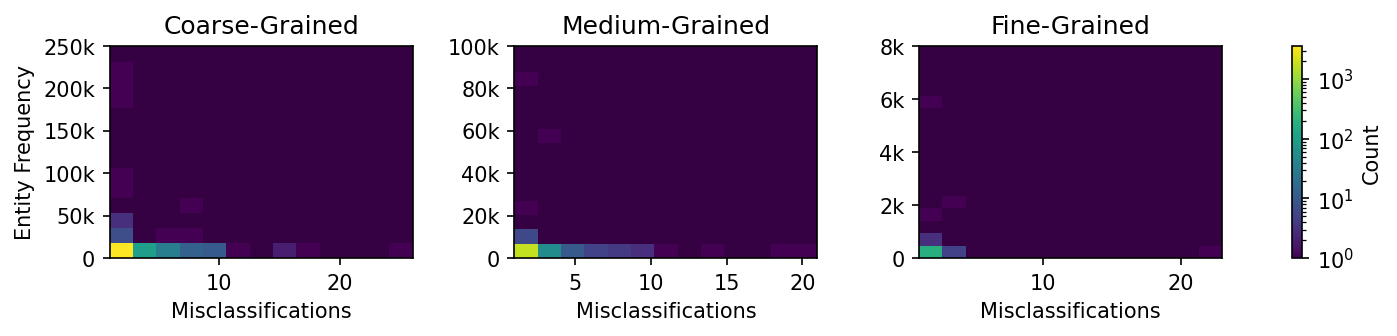

In [149]:
fig, axes = plt.subplots(1, 3, figsize=(10, 2), dpi=150)
fig.tight_layout(w_pad=3)
for i, ax, granularity in zip([1, 2, 3], axes, ['Coarse', 'Medium', 'Fine']):
    # Get the entities that are misclassified
    df_misclassified = df_misclassified_list[i - 1]

    # Draw a 2d histogram of the entity frequency per misclassification count
    ax.hist2d(df_misclassified['misclassified_count'], df_misclassified['nli_count'], bins=[13, 13], norm=LogNorm(vmin=1, vmax=cmax))
    ax.set_title(f'{granularity}-Grained')
    ax.set_xlabel('Misclassifications')
    ax.set_facecolor(dark_viridis)
    ax.set_yticks(ax.get_yticks())
    ax.set_yticklabels([number_to_reduced_string(int(y)) for y in ax.get_yticks()])


axes[0].set_ylabel('Entity Frequency');

fig.colorbar(axes[0].collections[0], ax=axes, location='right', label='Count');